# Predicting mRNA abundance directly from genomic sequence using deep convolutional neural networks
### Vikram Agarwal<sup>1,*</sup>, Jay Shendure<sup>1,2,3,*</sup>

1 Department of Genome Sciences, University of Washington, Seattle, WA 98195, USA  
2 Howard Hughes Medical Institute, Seattle, WA 98195, USA  
3 Brotman Baty Institute for Precision Medicine, University of Washington, Seattle, WA, USA

\* Correspondence to Vikram Agarwal (vagar@uw.edu) and Jay Shendure (shendure@uw.edu)

In [2]:
from wand.image import Image as WI

def get_fig_from_page(pg, left=True, full_w=True, top=300, height=500, shrink=1):
    filename = './Predicting_mRNA_abundance_directly_from_genomic_sequence_using_deep_convolutional_neural_networks.pdf[%i]' % pg
    img = WI(filename=filename, resolution=600)
    if left:
        left = 500
    else:
        left = int(img.size[0]/2)
    
    if full_w:
        width = 4200
    else:
        width = 2100
        
    img.crop(left, top, width=width, height= height)
    
    if shrink<1:
        w, h = img.size
        img.resize(int(w*shrink), int(h*shrink))
    return img

# Significance
* Data have shown that as much as 84% of variation in protein levels can be explained by mRNA levels, with transcription rates contributing 73%, and mRNA degradation rates contributing 11%


* Previous attempts at modeling transcription have not yielded high accuracy:
    1. Biochemical correlative analyses (e.g. histone markers, Transcription factor binding sites)
    2. Sequence based anlayses
    

* Recorded information governing transcirption makes creating an accurate model complicated

* Deep learning provides an opportunity to achieve state-of-the-art prediction performance despite incomplete biological information

* __Thereforre, the researchers have created Xpresso, a deep learning model generated to try and predict mRNA abundance from promoter sequence composition and mRNA degredation features__

# What is a deep learning and why is it so powerful?
* Deep learning algorithms are able to leverage large quantities of data to learn properties of the data without the need for feature engineering


* Deep learning has been able to spearhead advances in:
    * Self driving cars
    * Artifical limb movement
    * Complex task automation 


* Increasing amounts of public biolgoical information can be utilzed to train a deep learning model for biological insights


* Deep learning is usually implemented as a __deep neural network__

Source: https://www.sumologic.com/wp-content/uploads/performances_vs_data.png | Source: Nauman et al. 2017
:-------------------------|:-------------------------
![Deep leasrning versus Machine Learning](performances_vs_data.png)  |  ![Big data](Biology_Big_Data.png)

## What are neural networks?
* The building block of a neural network is called a __perceptron__
    
* A __neural netowk (NN)__ is a series of mulitlayered perceptrons that seek to predict an output. A __deep NN__ has many more layers than a regular NN and is better able to learn from more data

* For biologists, most deep learning is implemented in the form of __deep convolutional neural networks__
![all NN parts](Perceptron_SimpleNN_DeepNN_v2.png)

## What are convolutional neural networks?
* A __deep convolutional neural network (CNN)__ is a regular NN, but begins with two types of layers:
    * A __convolutional layer__ which creates a sliding window that moves across the DNA sequence
    * A __pooling layer__ that convolutional output and acquires the maximum value in a non-overlapping sliding window
    
    
* For sequence data, the __convolutional layers act as a collection of motif finders__ for an inputted DNA or protein sequence

# Convolutional and max pooling example
![CNN](Figure_2_How_NN_learns_v3.png)

# CNN example
![CNN](Figure_3_Proposed_NN_Architecture_v2.png)

# Raw data acquisition and preprocessing

* __To create the network, the researchs gathered both mouse and human data.__


* To train the network, researchers needed:
    * Promoter sequence for each gene (7,000 bp upstream the TSS; 3,500 bp downstream the TSS)
    * Expression data for each gene
    * Transcript sequence for each gene


* Gene exclusion criteria:
    * Non protein-coding genes
    * Genes on ChrY
    * Histone genes

# Promoters
* Human and mouse promoter CAGE peak annotations were downloaded from the FANTOM5 consortium’s UCSC data hub:
    * [human hg38 build](http://fantom.gsc.riken.jp/5/datahub/hg38/peaks/hg38.cage_peak.bb)
    * [Mouse mm10 build](http://fantom.gsc.riken.jp/5/datahub/mm10/peaks/mm10.cage_peak.bb)
* The best peak corresponding to each promoter, labeled with the keyword “p1@”, was extracted

![Promorer_preprocessing](Promoter_preprocessing.png)

# Expression levels
* Human normalized expression values for 56 tissues and cell lines were downloaded from [Epigenomics Roadmap Consortium]()
* Mouse ENCODE RNA-seq datasets satisfying the following constraints: 
    1. datasets corresponded to “polyA-selected mRNA RNA-seq” or “total RNA-seq”, 
    2. reads were mapped to the _Mus musculus_ mm10 genome assembly
    3. files were “tsv” files corresponding to gene-level quantifications
    4. biosamples were not treated with “DMS”, “LPS”, or “β-estradiol”, 
    5. files were not derived from samples with “low replicate concordance”, “low read depth”, “insufficient read depth”, or “insufficient read length”


* Only first replicate utilized 
* 254 datasets passed criteria 

![expression preprocessing](Gene_expression_preprocessing.png)

# Represenative transcripts
* Mouse and human transcripts were downloaded from Ensembl v90
* Representative transcript corresponding to each gene were chosen by order of importance:
    1. the one with the longest ORF
    2. longest 5′ UTR 
    3. longest 3′ UTR

![Transcript preprocessing](Transcript_preprocessing.png)

# Network architecture and tuning

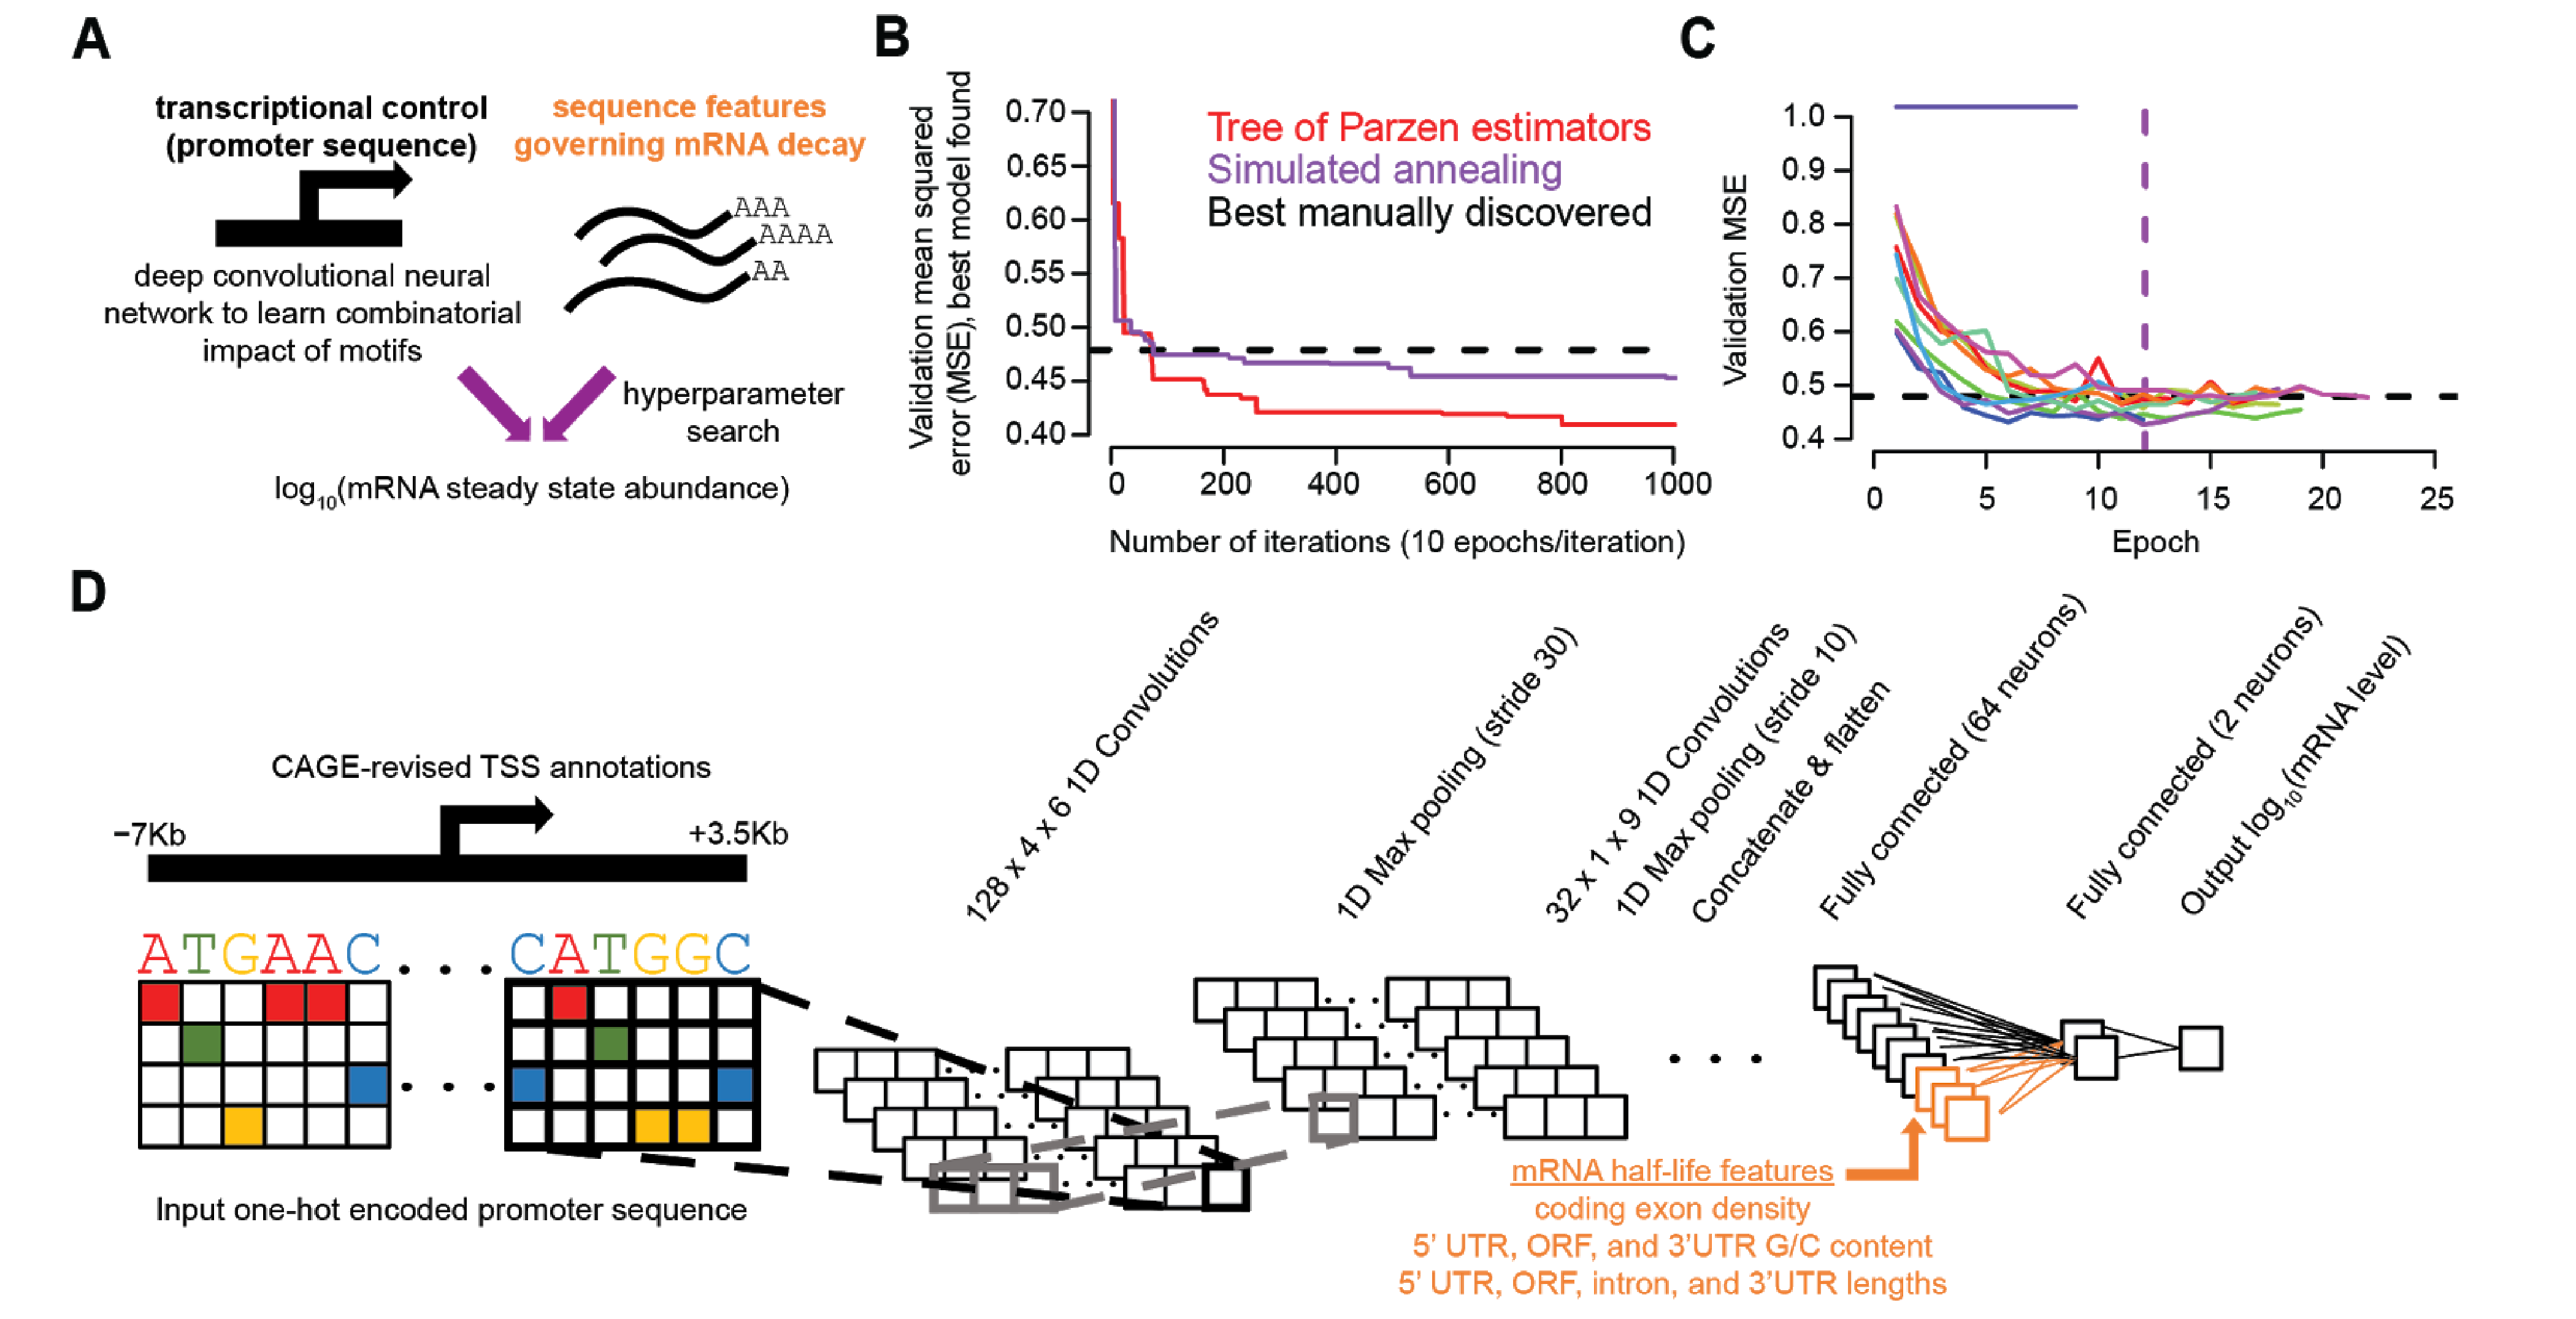

In [24]:
# Figure 1 
get_fig_from_page(34, left=True, full_w=True, top=1075, height=2150, shrink=1)

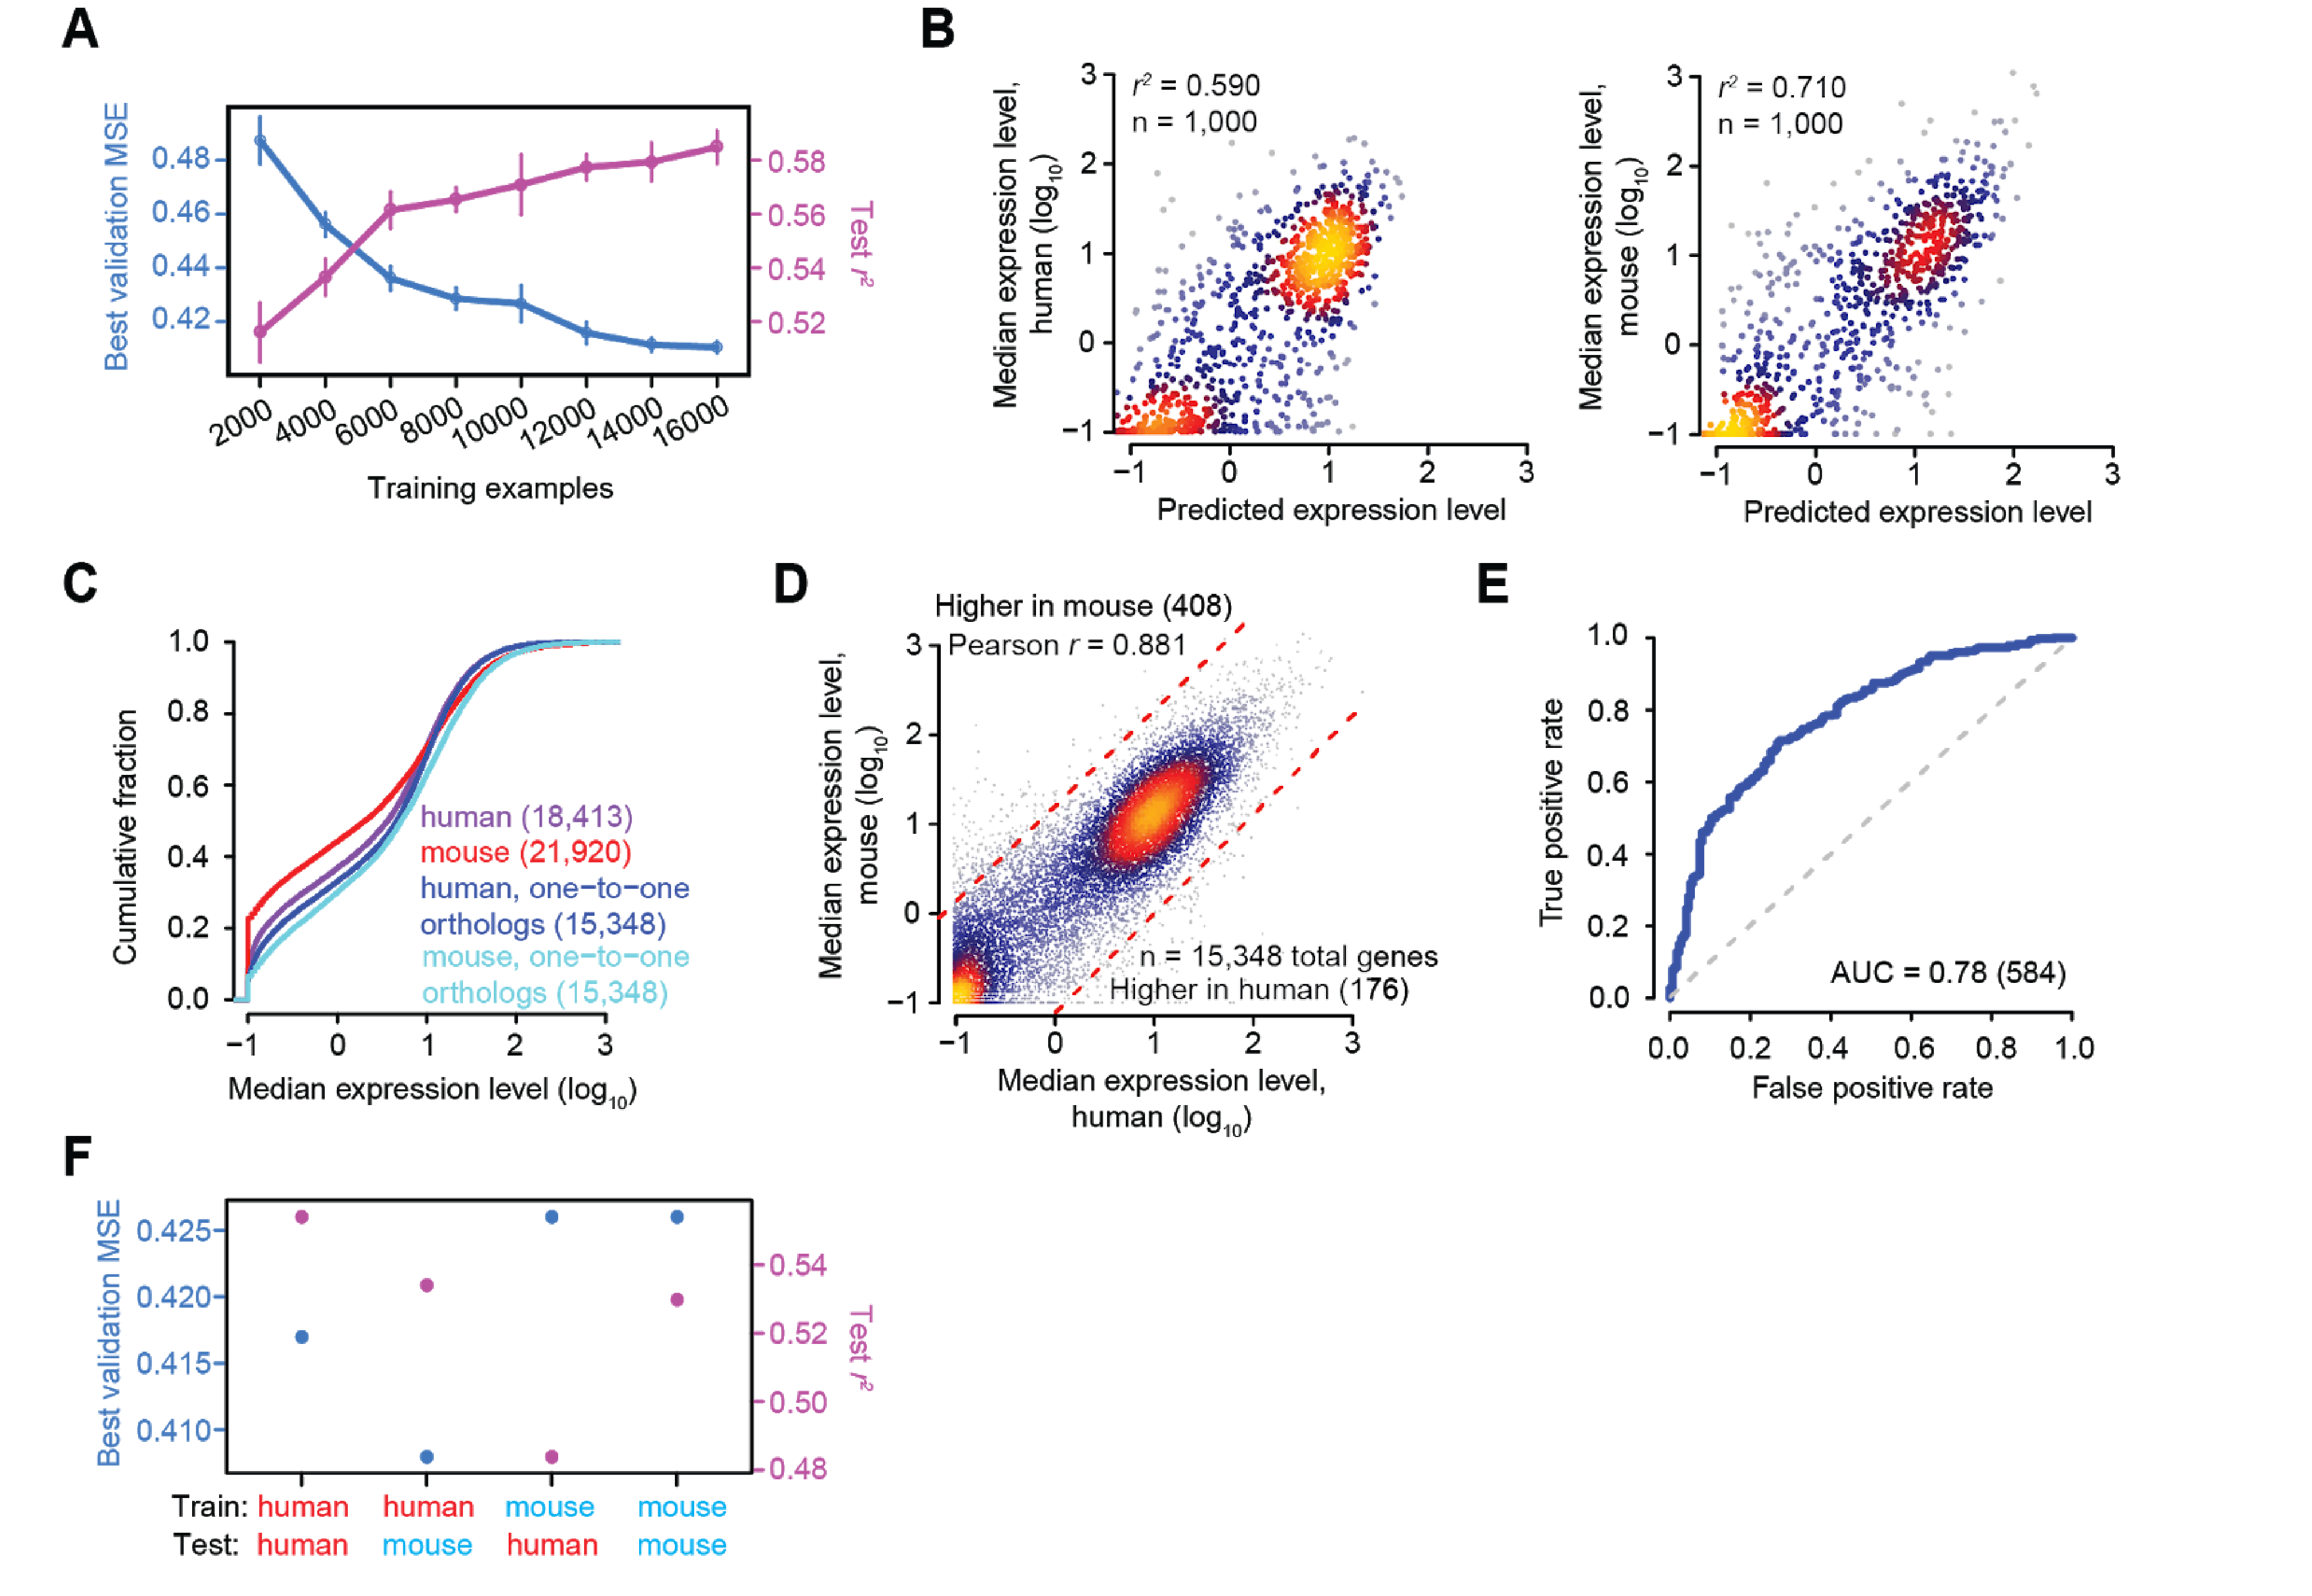

In [31]:
# Figure 2
get_fig_from_page(36, left=True, full_w=True, top=925, height=2900, shrink=1)

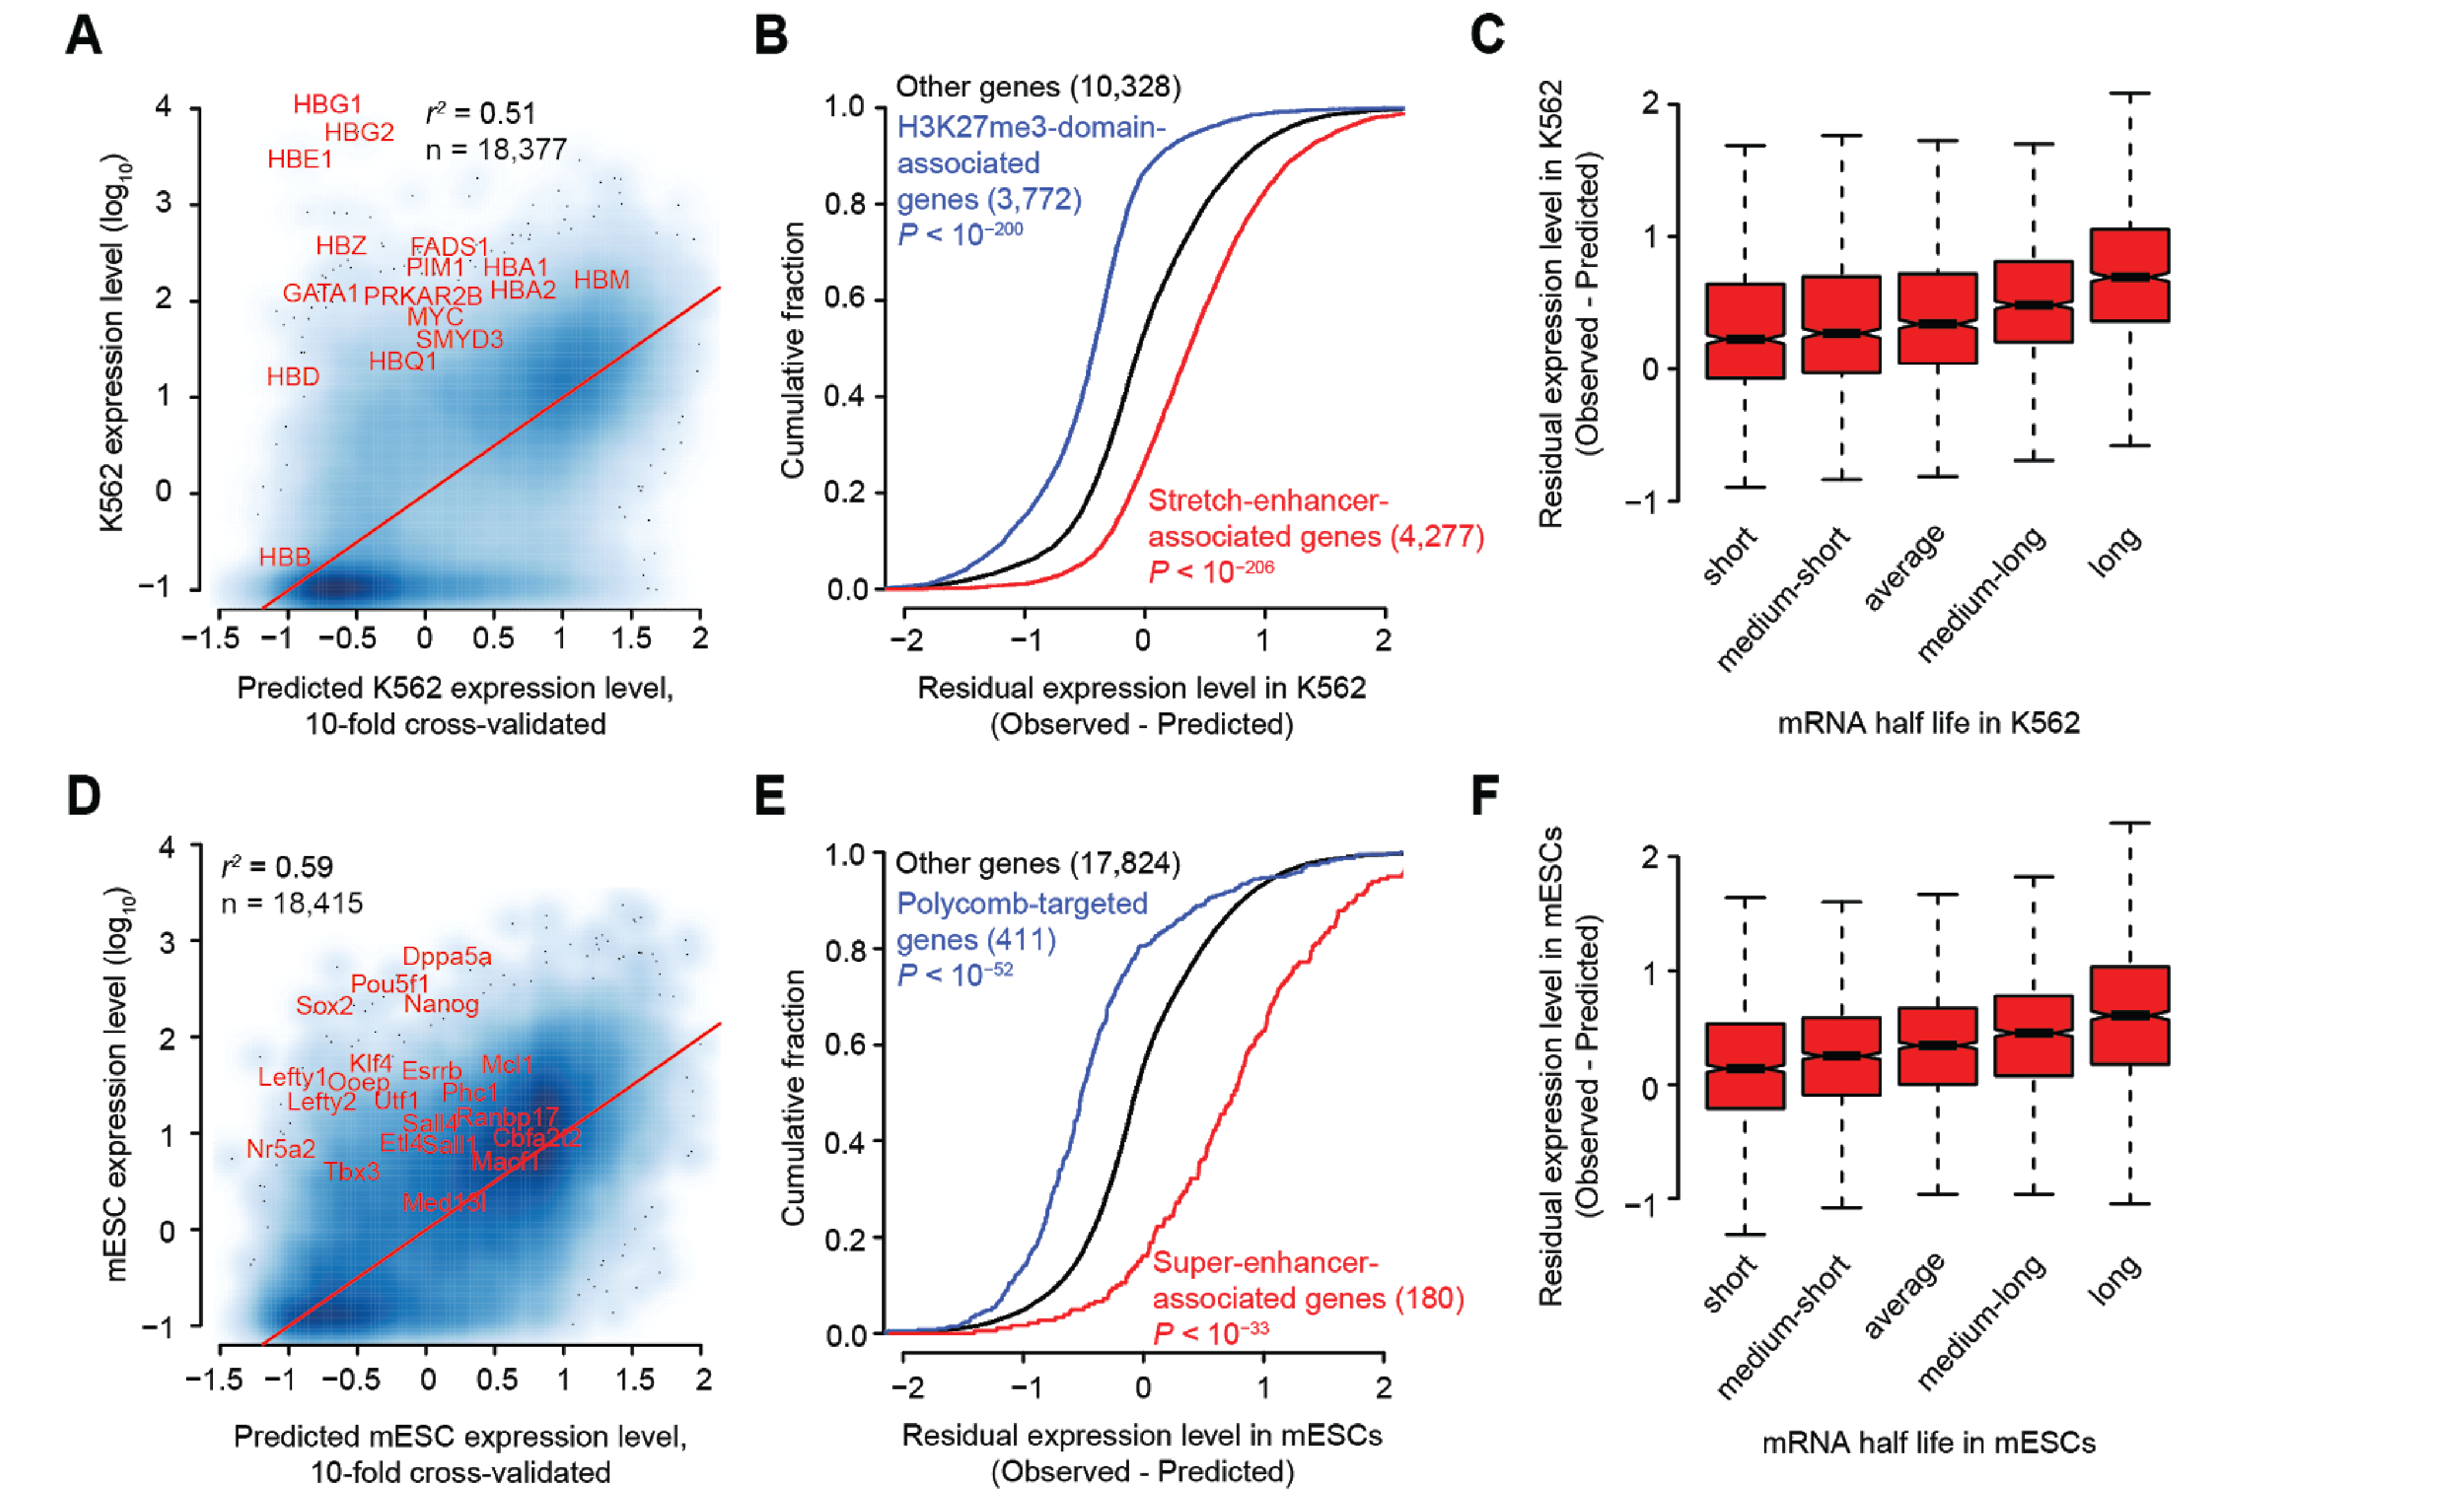

In [9]:
# Figure 3A - F
get_fig_from_page(38, left=True, full_w=True, top=900, height=2600, shrink=1)

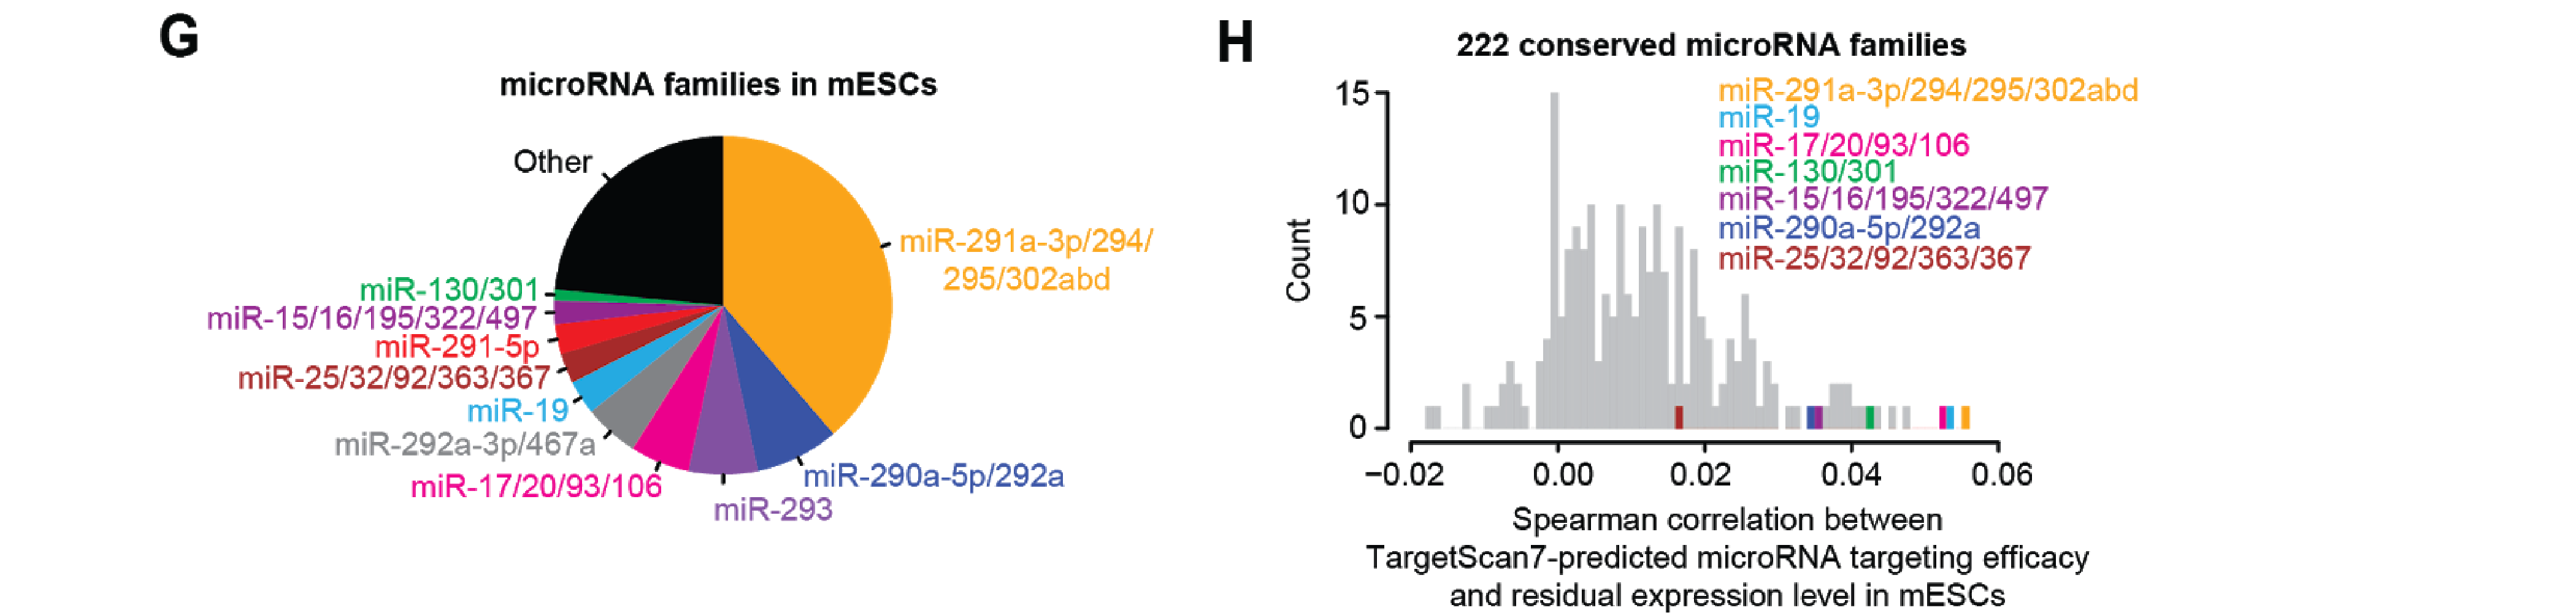

In [7]:
# Figure 3G - H
get_fig_from_page(38, left=True, full_w=True, top=3500, height=1000, shrink=1)

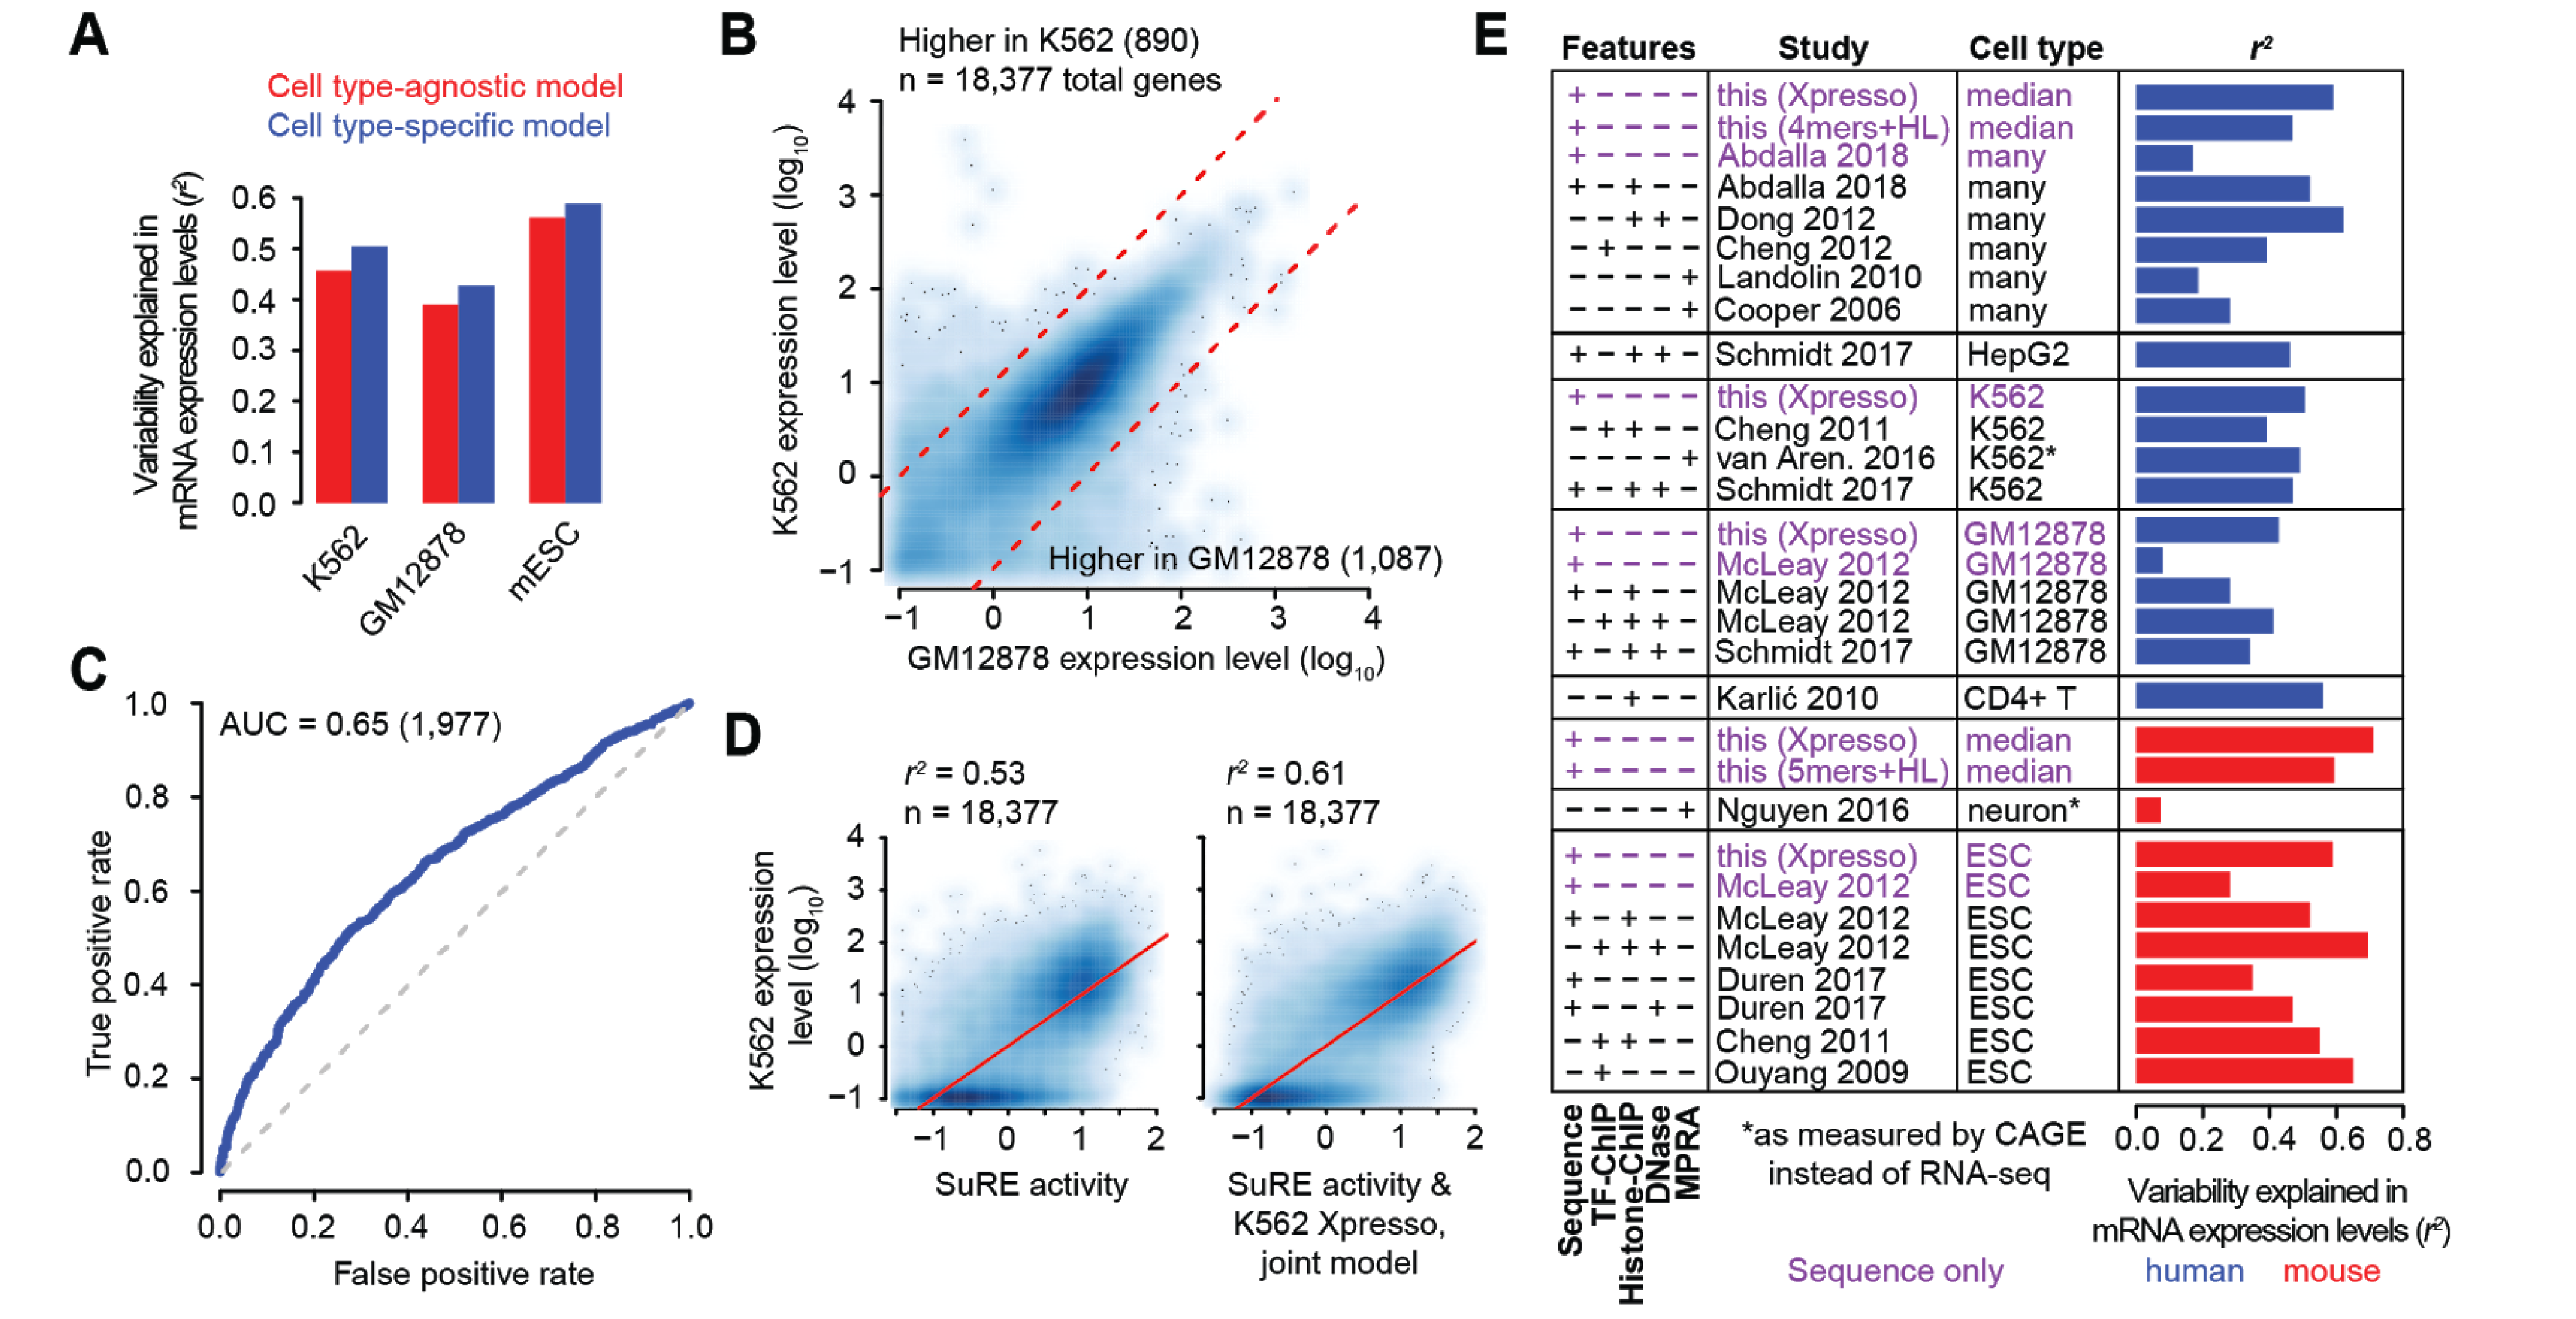

In [48]:
# Figure 4
get_fig_from_page(41, left=True, full_w=True, top=800, height=2150, shrink=1)

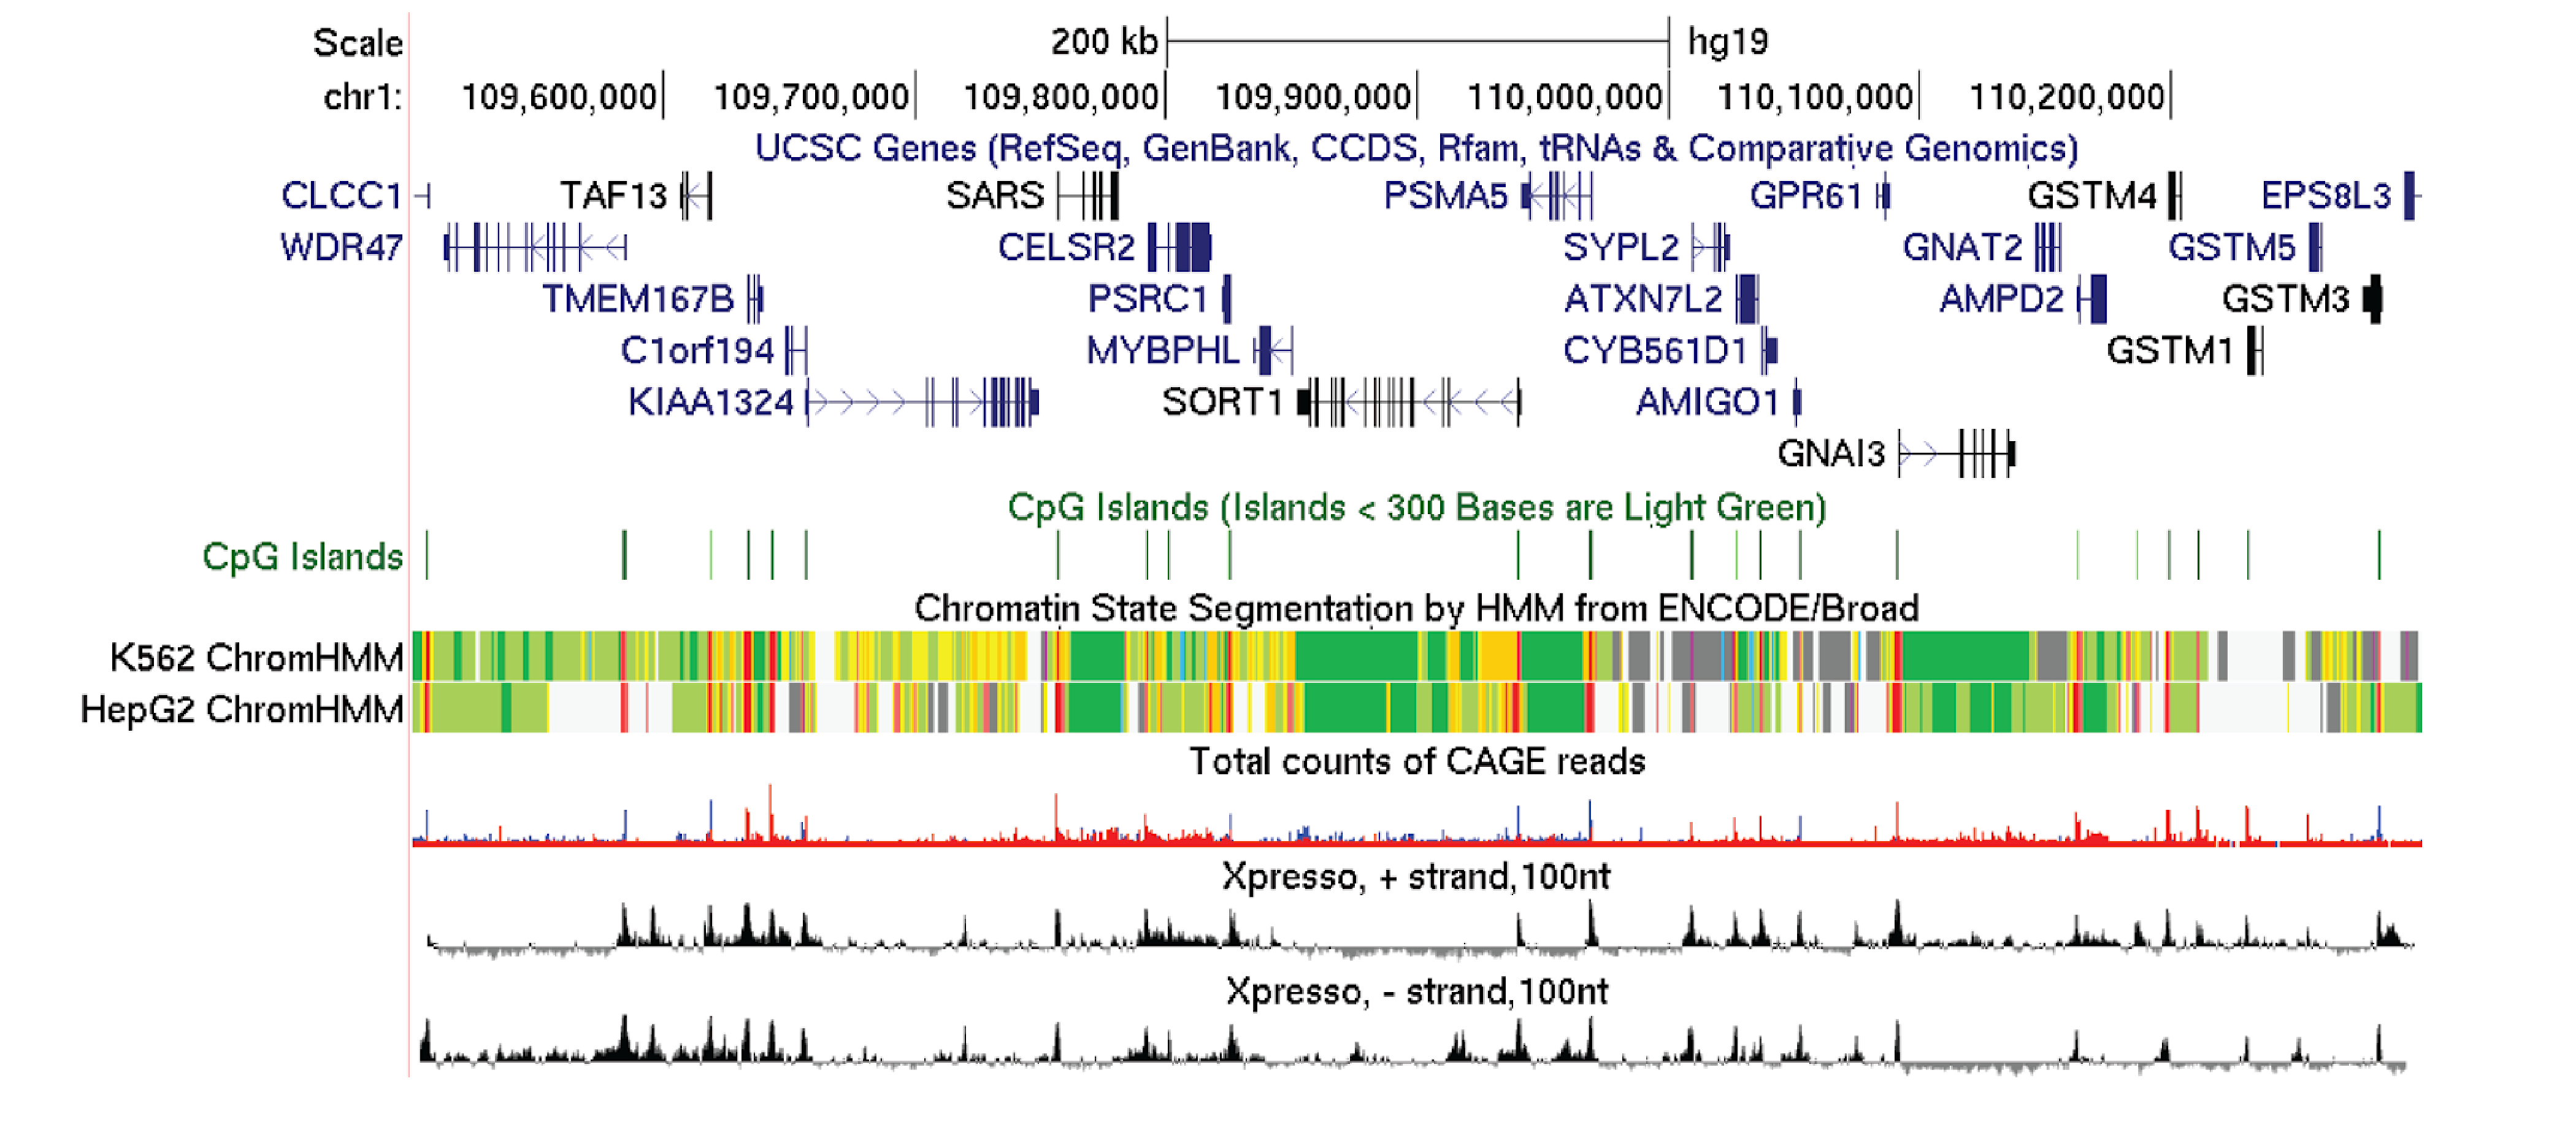

In [55]:
# Figure 5
get_fig_from_page(43, left=True, full_w=True, top=800, height=1850, shrink=1)

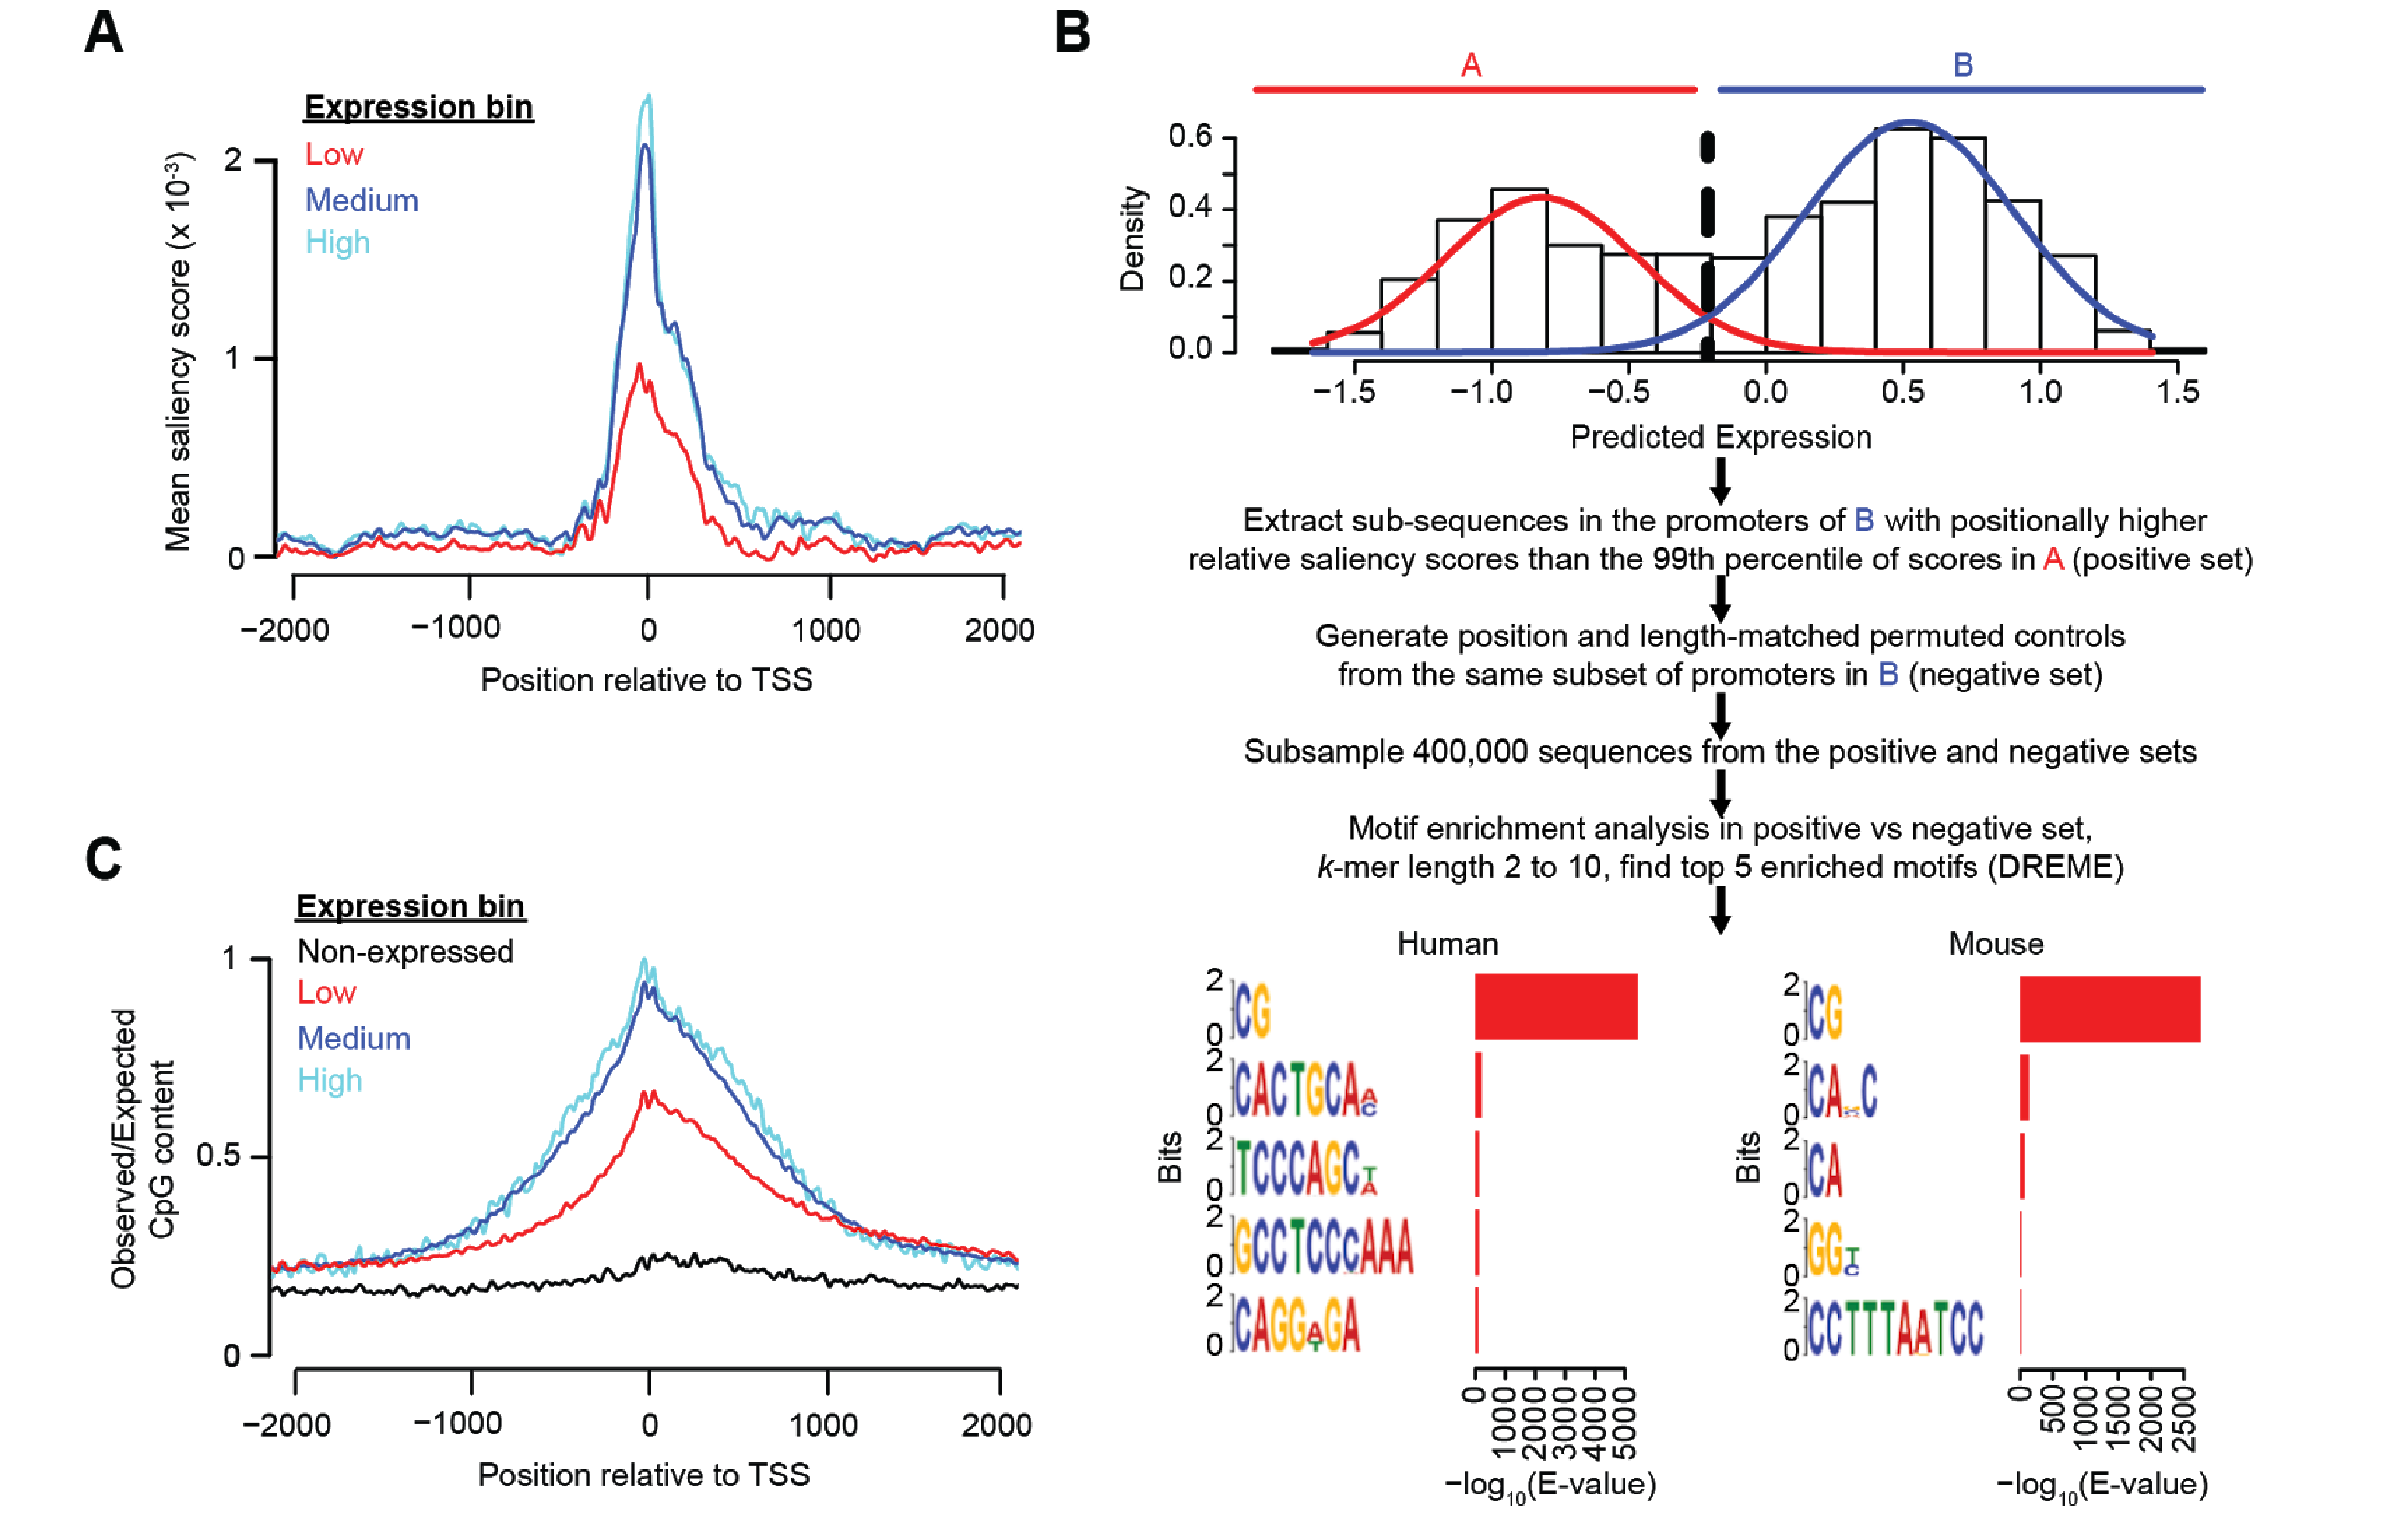

In [54]:
# Figure 6
get_fig_from_page(44, left=True, full_w=True, top=900, height=2650, shrink=1)

# Conclusions
* Xpresso can explain up to 59% of the variation for human gene expression and 71% for mouse gene expression from promoter sequence input and mRNA half-life proxy alone

* Xpresso outperforms other transcriptional models even when those models incorperate CHIP, DNase, TF CHIP, or MPRA data

* Although cell-type specific models showed a higher r<sup>2</sup>, the cell-type agnostic models showed comperable results to the cell-type specific models 

* The most relevent areas that the network uses for expression predictions reside near the transcription start site

* CpG islands within the proximal promoter are the most influential motif found for expression prediction

# Discussion
1. What do you think could be done to improve Xpresso?

2. What aditional analysis do you wish they had performed to validate Xpresso?

3. Do you agree that Xpresso is acurately predicting real world transciprtion efficiencies, or just looking for CG motifs near the transcription start site to inform its decision?